In [1]:
%matplotlib widget

# import matplotlib.pyplot as plt
import sys
import os
from pathlib import Path

SCRIPT_DIR = Path(os.getcwd()).parent
sys.path.append(os.path.dirname(SCRIPT_DIR))

In [2]:
import numpy as np
from python.psfs import PsfDonut2D, PsfVectorial
from python.mProfile import mProfile

In [3]:
psf_donut = PsfDonut2D() 
psf_vec = PsfVectorial() 

In [4]:
flposrel = np.array([10, 0, 0])
patternpos = np.array([37.5, 0., 0.])
phasemask = None
L = 75  


I_donut = psf_donut.intensity(flposrel,
                        patternpos,
                        phasemask,
                        L)
I_donut

(array([0.02134782]), array([1.]))

In [5]:
# mProfile.profileOn(['utilities.py', 'psf.py', 'psf_vectorial.py'])

# import cProfile, pstats, io
# from pstats import SortKey
# pr = cProfile.Profile()
# pr.enable()
I_model = psf_vec.calculatePSFs('vortex', 0)
# pr.disable()
# s = io.StringIO()
# sortby = SortKey.TIME
# ps = pstats.Stats(pr, stream=s).sort_stats(sortby)
# ps.print_stats()
# print(s.getvalue())

# mProfile.profileOff()
# mProfile.report()


vortex0 , 


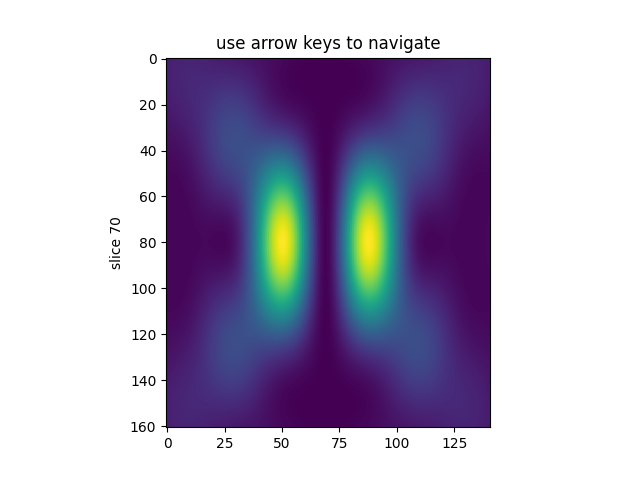

(<Figure size 640x480 with 1 Axes>,
 <python.tools.imx.IndexTracker at 0x110949890>)

In [6]:
from python.tools import imx

imx(psf_vec.imagestack(I_model).T, cmap='viridis')

In [7]:
a = psf_vec.imagestack(I_model)

In [16]:
psf_vec.PSFs[I_model].interp([10,0,0])

array([0.02660725])

In [9]:
np.max(psf_vec.PSFs[I_model].interp.values)

np.float64(0.28831990132814184)

In [10]:
x, y, z = psf_vec.PSFs[I_model].interp.grid

In [15]:
np.min(x)

np.float64(-710.0)

In [11]:
np.max(x)

np.float64(690.0000000000001)

In [12]:
np.max(y)

np.float64(690.0000000000001)

In [13]:
np.min(z)

np.float64(-810.0)

In [14]:
np.max(z)

np.float64(790.0000000000001)

In [ ]:
def setpar(**kwargs):
    parameters = {}
    # overwrite any of the parameter fields if they exist
    intersection_keys = parameters.keys() & kwargs.keys()

    for key in intersection_keys:
        parameters[key].update(kwargs[key])

    # otherwise add to addpar
    exclusive_keys = list(set(kwargs.keys()) - set(parameters.keys()))
    if len(exclusive_keys) > 0:
        parameters['addpar'] = {}
        for key in exclusive_keys:
            parameters['addpar'][key] = kwargs[key]

sys_aberr = {}
sys_aberr['Zr'] = np.zeros((2,3))
sys_aberr['Zr'][0,0], sys_aberr['Zr'][0,1], sys_aberr['Zr'][0,2] = 4, 0, 0.1   # spherical aberrations
sys_aberr['Zr'][1,0], sys_aberr['Zr'][1,1], sys_aberr['Zr'][1,2] = 2, 2, 0.05  # astigmatism
setpar(**sys_aberr)